<a target="_blank" href="https://colab.research.google.com/github/jvictorferreira3301/PDS/blob/main/audio_Tarefa_3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
<a href='https://github.com/jvictorferreira3301/PDS' target="_blank"><img alt='GitHub' src='https://img.shields.io/badge/Open_in Github-100000?style=plastic&logo=GitHub&logoColor=white&labelColor=black&color=black'/></a>
</a>

EC01045 - PROCESSAMENTO DIGITAL DE SINAIS (2024 .4 - T01)

Faculdade de Engenharia da Computação e Telecomunicações - Universidade Federal do Pará

Professor: Ronaldo de Freitas Zampolo 

Aluno: Joao Victor Santos Brito Ferreira


# Tarefa 3: filtragem

## Filtro 01

1. Considere o filtro discreto de resposta ao impulso $h[n] = \frac{1}{N}\left \{ u[n] - u[n-N]\right \}$, para $N=50$;
1. Implemente um código que determine a saída $y[n]$ desse filtro por convolução, dado que a entrada $x[n]$ é o sinal de [áudio da Tarefa 01](https://github.com/jvictorferreira3301/PDS/blob/main/REMO.wav).
1. Trace:
  - O diagrama de polos e zeros desse filtro;
  - O gráfico da magnitude da resposta em frequência $|H(\omega)|$ do filtro;
  - O gráfico do sinal de entrada $x[n]$;
  - O gráfico do sinal de saída $y[n]$;
  - O gráfico da magnitude da transformada de Fourier do sinal de entrada $|X(\omega)|$;
  - O gráfico da magnitude da transformada de Fourier do sinal de saída $|Y(\omega)|$.

In [ ]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, ifft
import os
from IPython.display import display, clear_output
import time as t

# Função para selecionar o arquivo localmente
def selecionar_arquivo_local():
    from tkinter import Tk
    from tkinter.filedialog import askopenfilename
    Tk().withdraw()  # Ocultar a janela principal do Tkinter
    arquivo = askopenfilename(filetypes=[("Arquivo WAV", "*.wav")])
    return arquivo

# Função para fazer upload do arquivo no Colab
def upload_arquivo_colab():
    from google.colab import files
    uploaded = files.upload()
    for filename in uploaded.keys():
        return filename

# Detectar automaticamente se está rodando no Google Colab
def is_running_in_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

# 1. Implementação do filtro h[n] = (1/N) * (u[n] - u[n-N])
def criar_filtro(N):
    """
    Cria o filtro de média móvel h[n] = (1/N) * (u[n] - u[n-N])
    
    Parameters:
    N (int): Tamanho da janela do filtro
    
    Returns:
    numpy.ndarray: Coeficientes do filtro
    """
    h = np.ones(N) / N  # Filtro de média móvel
    return h

# 2. Função para carregar áudio
def carregar_audio(wav_path):
    """
    Carrega um arquivo de áudio WAV
    
    Parameters:
    wav_path (str): Caminho para o arquivo WAV
    
    Returns:
    tuple: (sample_rate, data)
    """
    sample_rate, data = wavfile.read(wav_path)
    # Se estéreo, usar apenas um canal
    if len(data.shape) > 1:
        data = data[:, 0]
    return sample_rate, data

# 3. Aplicar convolução
def aplicar_convolucao(x, h):
    """
    Aplica convolução entre o sinal de entrada e o filtro
    
    Parameters:
    x (numpy.ndarray): Sinal de entrada
    h (numpy.ndarray): Resposta ao impulso do filtro
    
    Returns:
    numpy.ndarray: Sinal de saída
    """
    y = signal.convolve(x, h, mode='same')
    return y

# 4. Calcular zeros e polos
def calcular_zeros_polos(h):
    """
    Calcula os zeros e polos da função de transferência do filtro
    
    Parameters:
    h (numpy.ndarray): Resposta ao impulso do filtro
    
    Returns:
    tuple: (zeros, polos, ganho)
    """
    # Obtém os coeficientes da função de transferência
    b = h
    a = [1.0]
    return signal.tf2zpk(b, a)

# 5. Calcular resposta em frequência
def calcular_resposta_frequencia(h, fs=None, nfft=1024):
    """
    Calcula a resposta em frequência do filtro
    
    Parameters:
    h (numpy.ndarray): Resposta ao impulso do filtro
    fs (float, optional): Frequência de amostragem
    nfft (int): Número de pontos FFT
    
    Returns:
    tuple: (frequências, magnitude)
    """
    w, H = signal.freqz(h, worN=nfft)
    if fs is not None:
        # Se tiver fs, converte para Hz
        freq = w / np.pi * (fs/2)
    else:
        # Senão, mantém normalizado
        freq = w / np.pi
    magnitude = np.abs(H)
    return freq, magnitude

# 6. Plotar gráficos
def plotar_graficos(h, x, y, sample_rate):
    """
    Plota todos os gráficos solicitados com cores informativas
    
    Parameters:
    h (numpy.ndarray): Resposta ao impulso do filtro
    x (numpy.ndarray): Sinal de entrada
    y (numpy.ndarray): Sinal de saída
    sample_rate (int): Taxa de amostragem
    
    Returns:
    None
    """
    # Definir esquema de cores
    cores = {
        'zeros': '#3498db',  # Azul
        'polos': '#e74c3c',  # Vermelho
        'resposta_freq': '#2ecc71',  # Verde
        'entrada': '#9b59b6',  # Roxo
        'saida': '#f39c12',  # Laranja
        'entrada_fourier': '#9b59b6',  # Roxo
        'saida_fourier': '#f39c12',  # Laranja
        'grid': '#95a5a6'  # Cinza
    }
    
    plt.style.use('dark_background')
    # Figura para os gráficos
    fig = plt.figure(figsize=(18, 15))
    
    # 1. Diagrama de polos e zeros
    ax1 = fig.add_subplot(3, 2, 1)
    zeros, polos, ganho = calcular_zeros_polos(h)
    
    # Desenhar o círculo unitário
    theta = np.linspace(0, 2*np.pi, 200)
    ax1.plot(np.cos(theta), np.sin(theta), '--', color='gray', alpha=0.7)
    
    # Plotar zeros e polos
    ax1.scatter(np.real(zeros), np.imag(zeros), marker='o', s=100, color=cores['zeros'], label='Zeros')
    ax1.scatter(np.real(polos), np.imag(polos), marker='x', s=100, color=cores['polos'], label='Polos')
    ax1.set_title("Diagrama de Polos e Zeros", fontsize=14, fontweight='bold')
    ax1.set_xlabel("Parte Real", fontsize=12)
    ax1.set_ylabel("Parte Imaginária", fontsize=12)
    ax1.legend(fontsize=12)
    ax1.set_aspect('equal')
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # 2. Magnitude da resposta em frequência |H(ω)|
    ax2 = fig.add_subplot(3, 2, 2)
    freq, magnitude = calcular_resposta_frequencia(h, sample_rate)
    ax2.plot(freq, magnitude, color=cores['resposta_freq'], linewidth=2)
    ax2.set_title("Magnitude da Resposta em Frequência |H(ω)|", fontsize=14, fontweight='bold')
    ax2.set_xlabel("Frequência (Hz)", fontsize=12)
    ax2.set_ylabel("Magnitude", fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.set_xlim(0, sample_rate/2)  # Limitar às frequências positivas até Nyquist
    
    # 3. Sinal de entrada x[n]
    ax3 = fig.add_subplot(3, 2, 3)
    tempo = np.arange(len(x)) / sample_rate
    max_plot_time = min(5, tempo[-1])  # Limitar a 5 segundos para melhor visualização
    max_plot_samples = int(max_plot_time * sample_rate)
    ax3.plot(tempo[:max_plot_samples], x[:max_plot_samples], color=cores['entrada'], linewidth=1)
    ax3.set_title("Sinal de Entrada x[n]", fontsize=14, fontweight='bold')
    ax3.set_xlabel("Tempo (s)", fontsize=12)
    ax3.set_ylabel("Amplitude", fontsize=12)
    ax3.grid(True, linestyle='--', alpha=0.7)
    
    # 4. Sinal de saída y[n]
    ax4 = fig.add_subplot(3, 2, 4)
    ax4.plot(tempo[:max_plot_samples], y[:max_plot_samples], color=cores['saida'], linewidth=1)
    ax4.set_title("Sinal de Saída y[n]", fontsize=14, fontweight='bold')
    ax4.set_xlabel("Tempo (s)", fontsize=12)
    ax4.set_ylabel("Amplitude", fontsize=12)
    ax4.grid(True, linestyle='--', alpha=0.7)
    
    # 5. Magnitude da transformada de Fourier do sinal de entrada |X(ω)|
    ax5 = fig.add_subplot(3, 2, 5)
    X = fft(x)
    X_mag = np.abs(fftshift(X))
    freq_x = np.linspace(-sample_rate/2, sample_rate/2, len(X))
    ax5.plot(freq_x, X_mag, color=cores['entrada_fourier'], linewidth=1.5)
    ax5.set_title("Magnitude da Transformada de Fourier do Sinal de Entrada |X(ω)|", fontsize=14, fontweight='bold')
    ax5.set_xlabel("Frequência (Hz)", fontsize=12)
    ax5.set_ylabel("Magnitude", fontsize=12)
    ax5.grid(True, linestyle='--', alpha=0.7)
    ax5.set_xlim(-sample_rate/4, sample_rate/4)  # Zoom nas frequências centrais
    
    # 6. Magnitude da transformada de Fourier do sinal de saída |Y(ω)|
    ax6 = fig.add_subplot(3, 2, 6)
    Y = fft(y)
    Y_mag = np.abs(fftshift(Y))
    freq_y = np.linspace(-sample_rate/2, sample_rate/2, len(Y))
    ax6.plot(freq_y, Y_mag, color=cores['saida_fourier'], linewidth=1.5)
    ax6.set_title("Magnitude da Transformada de Fourier do Sinal de Saída |Y(ω)|", fontsize=14, fontweight='bold')
    ax6.set_xlabel("Frequência (Hz)", fontsize=12)
    ax6.set_ylabel("Magnitude", fontsize=12)
    ax6.grid(True, linestyle='--', alpha=0.7)
    ax6.set_xlim(-sample_rate/4, sample_rate/4)  # Zoom nas frequências centrais
    
    plt.tight_layout()
    plt.show()


Processamento do filtro de média móvel h[n] = (1/N) * (u[n] - u[n-N])
Detectado ambiente local. Por favor, selecione o arquivo WAV.
Arquivo selecionado: /home/jv/GitHub/PDS/REMO.wav
Frequência de amostragem: 44100 Hz
Duração do áudio: 10.01 segundos
Criado filtro de média móvel com janela de tamanho N = 50
Aplicando filtro ao sinal...
Gerando gráficos...


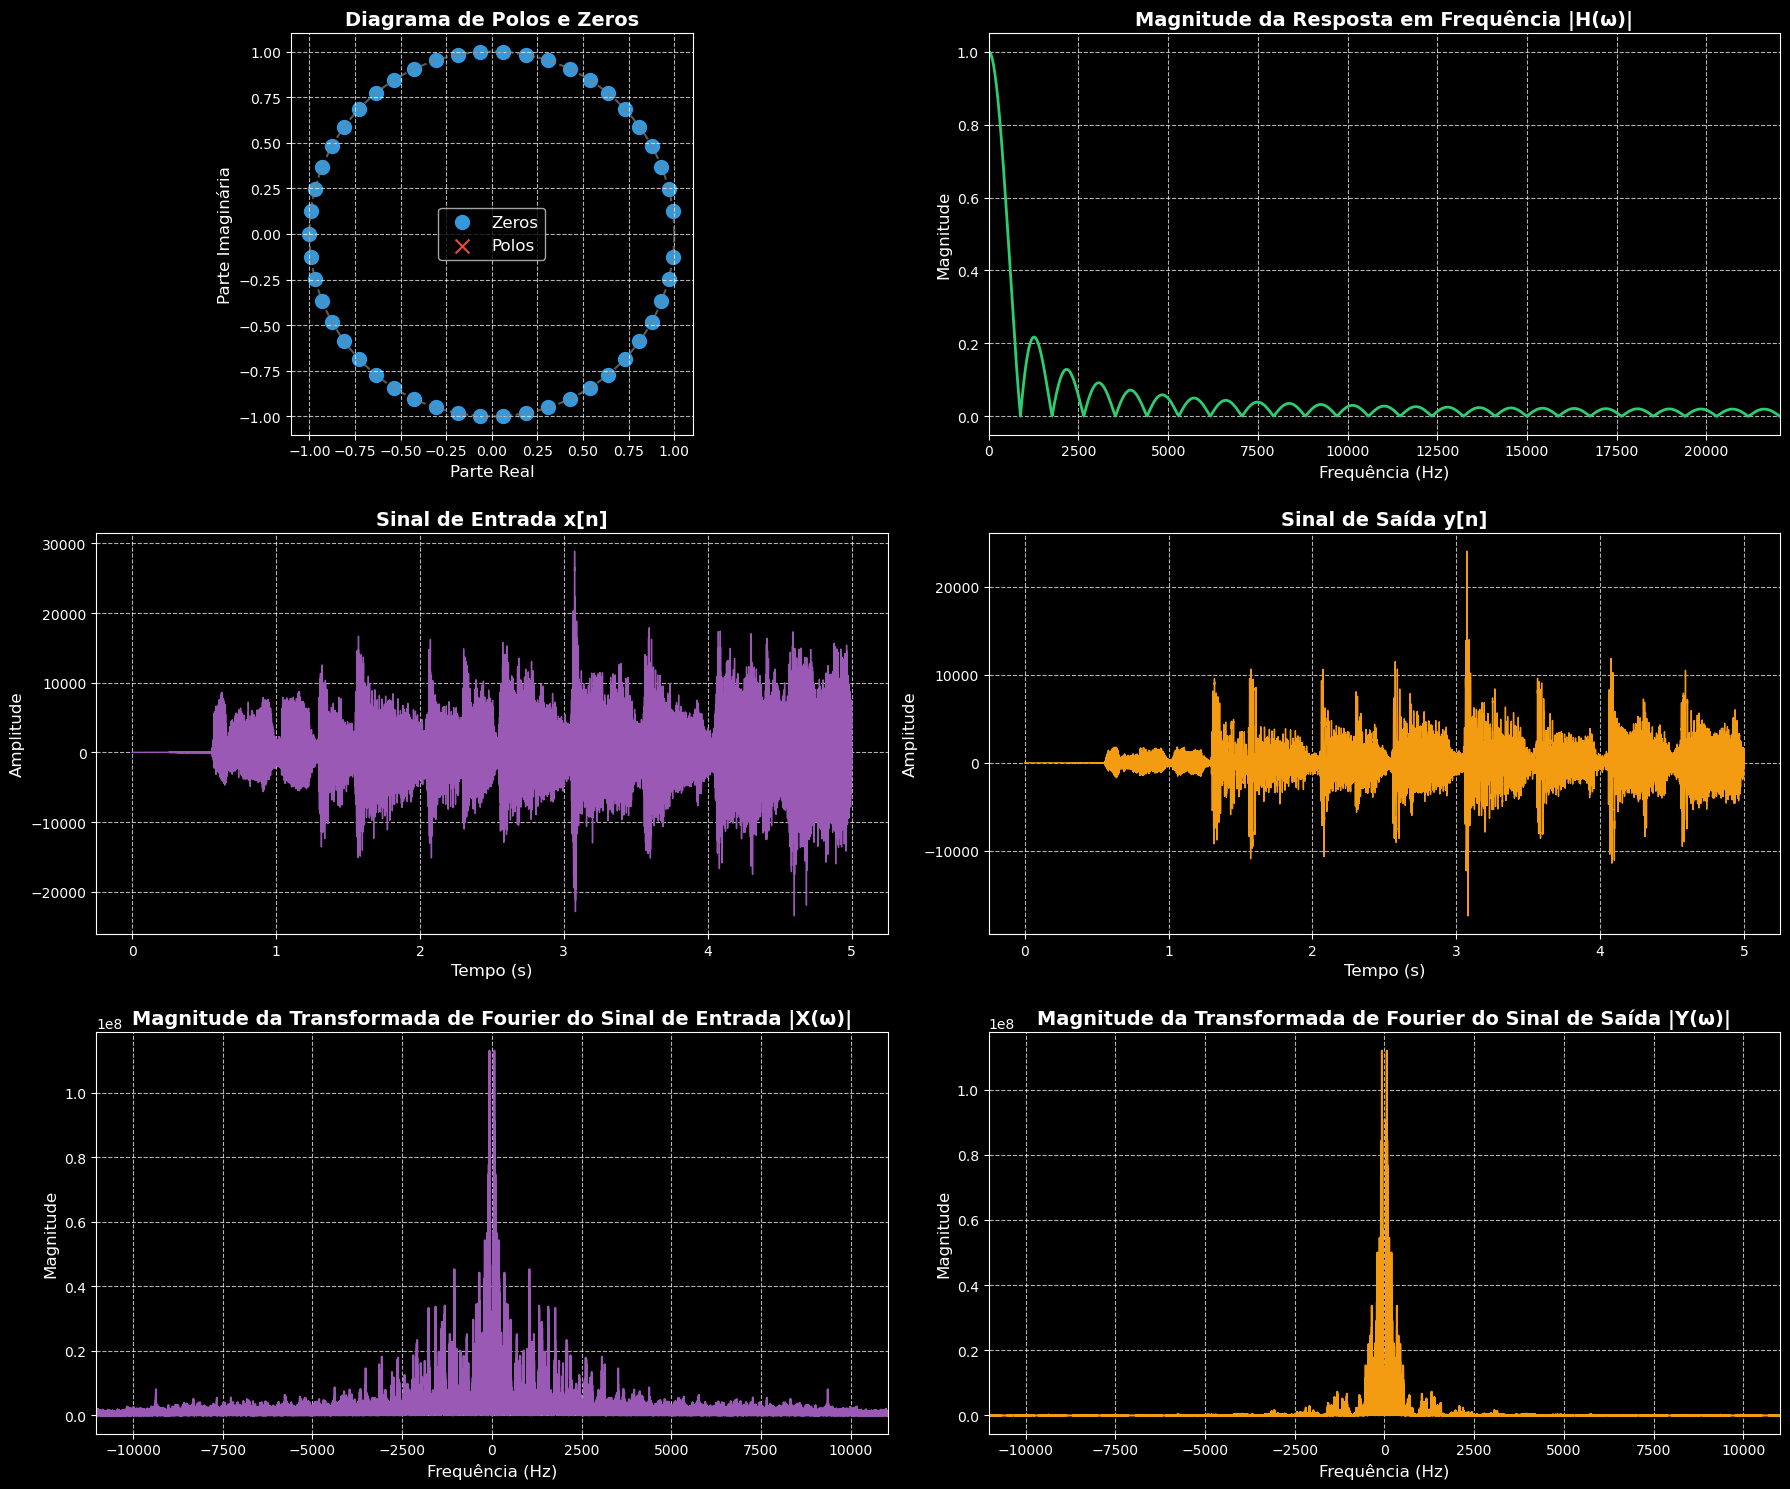

Áudio filtrado salvo como: filtrado_REMO.wav


In [5]:
# Função principal
def main(N=50):
    """
    Função principal que implementa o filtro e gera todos os gráficos
    
    Parameters:
    N (int): Tamanho da janela do filtro
    
    Returns:
    tuple: (x, h, y, sample_rate)
    """
    print("Processamento do filtro de média móvel h[n] = (1/N) * (u[n] - u[n-N])")
    
    # Detectar ambiente e carregar arquivo
    if is_running_in_colab():
        print("Detectado ambiente Google Colab. Por favor, faça upload do arquivo WAV.")
        wav_path = upload_arquivo_colab()
    else:
        print("Detectado ambiente local. Por favor, selecione o arquivo WAV.")
        wav_path = selecionar_arquivo_local()
    
    if not wav_path:
        print("Nenhum arquivo selecionado. Encerrando.")
        return None, None, None, None
    
    print(f"Arquivo selecionado: {wav_path}")
    
    # Carregar o áudio
    sample_rate, x = carregar_audio(wav_path)
    print(f"Frequência de amostragem: {sample_rate} Hz")
    print(f"Duração do áudio: {len(x)/sample_rate:.2f} segundos")
    
    # Criar o filtro
    h = criar_filtro(N)
    print(f"Criado filtro de média móvel com janela de tamanho N = {N}")
    
    # Aplicar convolução
    print("Aplicando filtro ao sinal...")
    y = aplicar_convolucao(x, h)
    
    # Plotar gráficos
    print("Gerando gráficos...")
    plotar_graficos(h, x, y, sample_rate)
    
    # Nome do arquivo de saída
    output_file = f"filtrado_{os.path.basename(wav_path)}"
    
    # Salvar o sinal de saída como um arquivo WAV
    wavfile.write(output_file, sample_rate, y.astype(np.int16))
    print(f"Áudio filtrado salvo como: {output_file}")
    
    return x, h, y, sample_rate

# Chamar a função principal se o script for executado diretamente
if __name__ == "__main__":
    N = 50  # Tamanho da janela do filtro
    x, h, y, sample_rate = main(N)

## Filtro 02

1. Considere o filtro discreto de função de transferência
\begin{equation}
H(z) = \beta\frac{1-2\cos(f_s/N)z^{-1} + z^{-2}}{1-az^{-1}},\quad |z|>|a|
\end{equation}
onde $f_s$ é a frequência de amostragem usada na aquisição do sinal de áudio da Tarefa 1, $N=50$, $a=0,85$, e $\beta$ igual a
\begin{equation}
\beta = \frac{1-a}{2[1-\cos(f_s/N)]}.
\end{equation}
1. Implemente um código que determine a saída $y[n]$ desse filtro, usando equações de diferença, dado que a entrada $x[n]$ é o sinal de áudio da Tarefa 01.
1. Trace:
  - O diagrama de polos e zeros desse filtro;
  - O gráfico da magnitude da resposta em frequência $|H(\omega)|$ do filtro;
  - O gráfico do sinal de entrada $x[n]$;
  - O gráfico do sinal de saída $y[n]$;
  - O gráfico da magnitude da transformada de Fourier do sinal de entrada $|X(\omega)|$;
  - O gráfico da magnitude da transformada de Fourier do sinal de saída $|Y(\omega)|$.

In [7]:
# Implementação do filtro usando função de transferência
def criar_coeficientes_filtro2(fs, N=50, a=0.85):
    """
    Cria os coeficientes do filtro:
    H(z) = β(1-2cos(fs/N)z^(-1)+z^(-2))/(1-az^(-1))
    
    Parameters:
    fs (float): Frequência de amostragem
    N (int): Parâmetro do filtro
    a (float): Parâmetro do polo
    
    Returns:
    tuple: (b, a) - coeficientes do numerador e denominador
    """
    # Calcular beta
    beta = (1 - a) / (2 * (1 - np.cos(fs / N)))
    
    # Coeficientes do numerador (b)
    b = np.zeros(3)
    b[0] = beta
    b[1] = -2 * beta * np.cos(fs / N)
    b[2] = beta
    
    # Coeficientes do denominador (a)
    a_coefs = np.zeros(2)
    a_coefs[0] = 1
    a_coefs[1] = -a
    
    return b, a_coefs

# Função para aplicar o filtro usando equações de diferença
def aplicar_filtro2(x, b, a_coefs):
    """
    Aplica o filtro usando equações de diferença
    y[n] = b[0]*x[n] + b[1]*x[n-1] + b[2]*x[n-2] - a[1]*y[n-1]
    
    Parameters:
    x (numpy.ndarray): Sinal de entrada
    b (numpy.ndarray): Coeficientes do numerador
    a_coefs (numpy.ndarray): Coeficientes do denominador
    
    Returns:
    numpy.ndarray: Sinal filtrado
    """
    N = len(x)
    y = np.zeros(N)
    
    # Aplicar equação de diferença
    for n in range(N):
        # Termo atual
        y[n] = b[0] * x[n]
        
        # Termos passados de x
        if n >= 1:
            y[n] += b[1] * x[n-1]
        if n >= 2:
            y[n] += b[2] * x[n-2]
            
        # Termos passados de y
        if n >= 1:
            y[n] += -a_coefs[1] * y[n-1]
    
    return y

# Função para calcular zeros e polos
def calcular_zeros_polos2(b, a_coefs):
    """
    Calcula os zeros e polos da função de transferência
    
    Parameters:
    b (numpy.ndarray): Coeficientes do numerador
    a_coefs (numpy.ndarray): Coeficientes do denominador
    
    Returns:
    tuple: (zeros, polos, ganho)
    """
    return signal.tf2zpk(b, a_coefs)

# Função para calcular a resposta em frequência
def calcular_resposta_frequencia2(b, a_coefs, fs, nfft=8192):
    """
    Calcula a resposta em frequência do filtro
    
    Parameters:
    b (numpy.ndarray): Coeficientes do numerador
    a_coefs (numpy.ndarray): Coeficientes do denominador
    fs (float): Frequência de amostragem
    nfft (int): Número de pontos para cálculo da FFT
    
    Returns:
    tuple: (frequências, magnitude)
    """
    w, h = signal.freqz(b, a_coefs, worN=nfft)
    freq = w / np.pi * (fs/2)  # Convertendo para Hz
    magnitude = np.abs(h)
    
    return freq, magnitude

# Função para plotar todos os gráficos (análise estática)
def plotar_graficos2(b, a_coefs, x, y, fs):
    """
    Plota todos os gráficos solicitados em uma análise estática
    
    Parameters:
    b (numpy.ndarray): Coeficientes do numerador
    a_coefs (numpy.ndarray): Coeficientes do denominador
    x (numpy.ndarray): Sinal de entrada
    y (numpy.ndarray): Sinal filtrado
    fs (float): Frequência de amostragem
    """
    # Definir esquema de cores
    cores = {
        'zeros': '#3498db',  # Azul
        'polos': '#e74c3c',  # Vermelho
        'resposta_freq': '#2ecc71',  # Verde
        'entrada': '#9b59b6',  # Roxo
        'saida': '#f39c12',  # Laranja
        'entrada_fourier': '#9b59b6',  # Roxo
        'saida_fourier': '#f39c12',  # Laranja
    }
    
    plt.style.use('dark_background')

    # Figura para os gráficos
    fig = plt.figure(figsize=(18, 15))
    
    # 1. Diagrama de polos e zeros
    ax1 = fig.add_subplot(3, 2, 1)
    zeros, polos, ganho = calcular_zeros_polos2(b, a_coefs)
    
    # Desenhar o círculo unitário
    theta = np.linspace(0, 2*np.pi, 200)
    ax1.plot(np.cos(theta), np.sin(theta), '--', color='gray', alpha=0.7)
    
    # Plotar zeros e polos
    ax1.scatter(np.real(zeros), np.imag(zeros), marker='o', s=100, color=cores['zeros'], label='Zeros')
    ax1.scatter(np.real(polos), np.imag(polos), marker='x', s=100, color=cores['polos'], label='Polos')
    ax1.set_title("Diagrama de Polos e Zeros", fontsize=14, fontweight='bold')
    ax1.set_xlabel("Parte Real", fontsize=12)
    ax1.set_ylabel("Parte Imaginária", fontsize=12)
    ax1.legend(fontsize=12)
    ax1.set_aspect('equal')
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # 2. Magnitude da resposta em frequência |H(ω)|
    ax2 = fig.add_subplot(3, 2, 2)
    freq, magnitude = calcular_resposta_frequencia2(b, a_coefs, fs)
    ax2.plot(freq, magnitude, color=cores['resposta_freq'], linewidth=2)
    ax2.set_title("Magnitude da Resposta em Frequência |H(ω)|", fontsize=14, fontweight='bold')
    ax2.set_xlabel("Frequência (Hz)", fontsize=12)
    ax2.set_ylabel("Magnitude", fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.set_xlim(0, fs/2)  # Limitar às frequências positivas até Nyquist
    
    # 3. Sinal de entrada x[n]
    ax3 = fig.add_subplot(3, 2, 3)
    tempo = np.arange(len(x)) / fs
    max_plot_time = min(5, tempo[-1])  # Limitar a 5 segundos para melhor visualização
    max_plot_samples = int(max_plot_time * fs)
    
    ax3.plot(tempo[:max_plot_samples], x[:max_plot_samples], color=cores['entrada'], linewidth=1)
    ax3.set_title("Sinal de Entrada x[n]", fontsize=14, fontweight='bold')
    ax3.set_xlabel("Tempo (s)", fontsize=12)
    ax3.set_ylabel("Amplitude", fontsize=12)
    ax3.grid(True, linestyle='--', alpha=0.7)
    
    # 4. Sinal de saída y[n]
    ax4 = fig.add_subplot(3, 2, 4)
    ax4.plot(tempo[:max_plot_samples], y[:max_plot_samples], color=cores['saida'], linewidth=1)
    ax4.set_title("Sinal de Saída y[n]", fontsize=14, fontweight='bold')
    ax4.set_xlabel("Tempo (s)", fontsize=12)
    ax4.set_ylabel("Amplitude", fontsize=12)
    ax4.grid(True, linestyle='--', alpha=0.7)
    
    # 5. Magnitude da transformada de Fourier do sinal de entrada |X(ω)|
    ax5 = fig.add_subplot(3, 2, 5)
    X = fft(x)
    X_mag = np.abs(fftshift(X))
    freq_x = np.linspace(-fs/2, fs/2, len(X))
    ax5.plot(freq_x, X_mag, color=cores['entrada_fourier'], linewidth=1.5)
    ax5.set_title("Magnitude da Transformada de Fourier do Sinal de Entrada |X(ω)|", fontsize=14, fontweight='bold')
    ax5.set_xlabel("Frequência (Hz)", fontsize=12)
    ax5.set_ylabel("Magnitude", fontsize=12)
    ax5.grid(True, linestyle='--', alpha=0.7)
    ax5.set_xlim(-fs/4, fs/4)  # Zoom nas frequências centrais
    
    # 6. Magnitude da transformada de Fourier do sinal de saída |Y(ω)|
    ax6 = fig.add_subplot(3, 2, 6)
    Y = fft(y)
    Y_mag = np.abs(fftshift(Y))
    freq_y = np.linspace(-fs/2, fs/2, len(Y))
    ax6.plot(freq_y, Y_mag, color=cores['saida_fourier'], linewidth=1.5)
    ax6.set_title("Magnitude da Transformada de Fourier do Sinal de Saída |Y(ω)|", fontsize=14, fontweight='bold')
    ax6.set_xlabel("Frequência (Hz)", fontsize=12)
    ax6.set_ylabel("Magnitude", fontsize=12)
    ax6.grid(True, linestyle='--', alpha=0.7)
    ax6.set_xlim(-fs/4, fs/4)  # Zoom nas frequências centrais
    
    plt.tight_layout()
    plt.show()


Processando filtro com função de transferência H(z) = β(1-2cos(fs/N)z^(-1)+z^(-2))/(1-az^(-1))
Detectado ambiente local. Por favor, selecione o arquivo WAV.
Arquivo selecionado: /home/jv/GitHub/PDS/REMO.wav
Frequência de amostragem: 44100 Hz
Duração do áudio: 10.01 segundos
Coeficientes do filtro:
Numerador (b): [0.04397296 0.06205409 0.04397296]
Denominador (a): [ 1.   -0.85]
Aplicando o filtro usando equações de diferença...
Gerando gráficos...


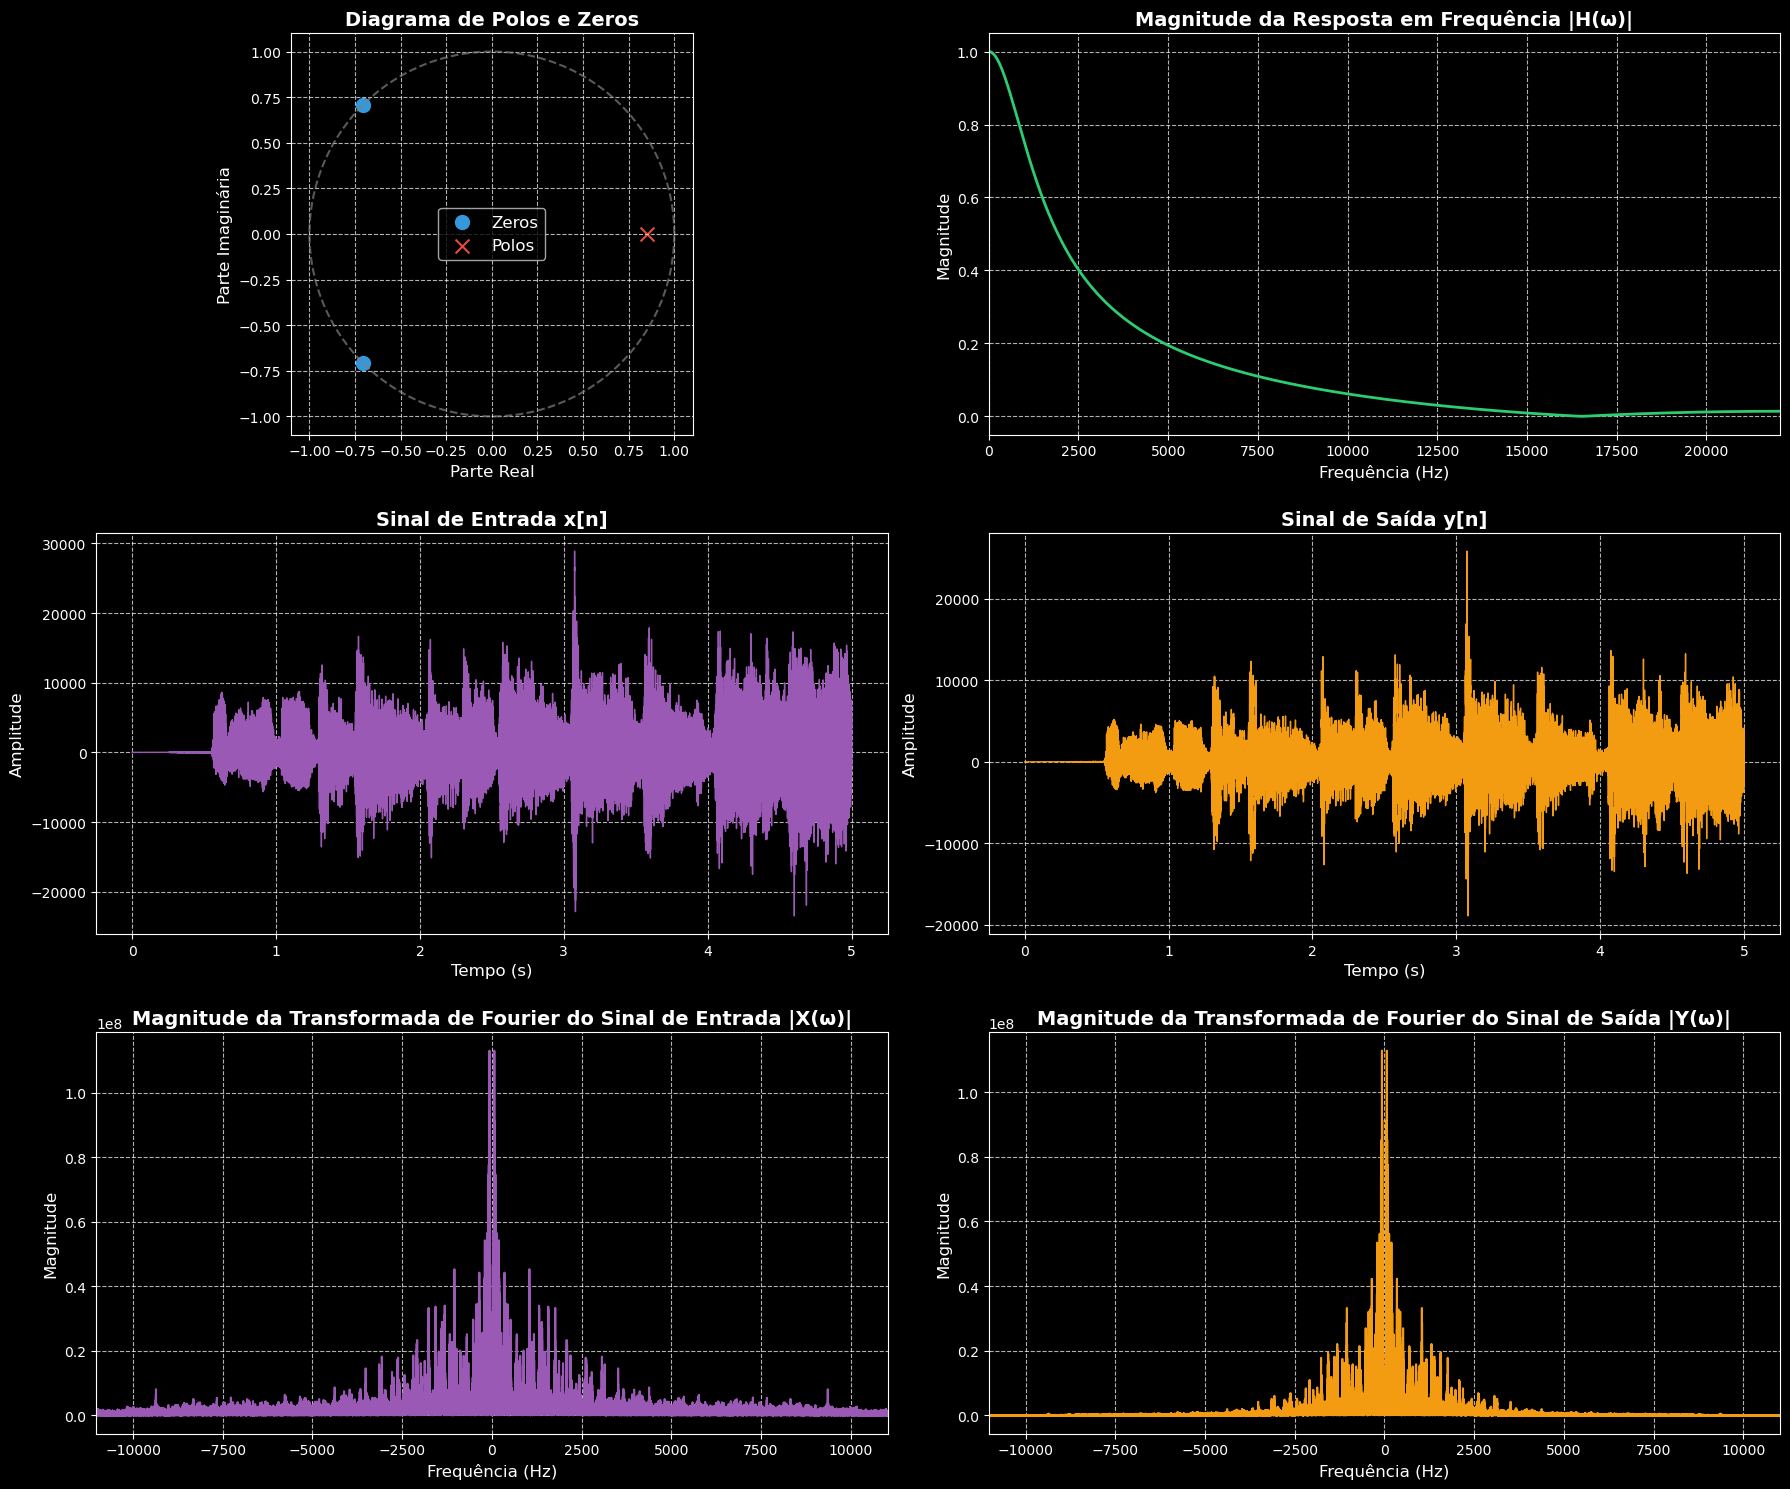

Áudio filtrado salvo como: filtrado_REMO.wav


In [8]:
# Função principal modificada sem a visualização dinâmica
def main():
    """Função principal do programa"""
    print("Processando filtro com função de transferência H(z) = β(1-2cos(fs/N)z^(-1)+z^(-2))/(1-az^(-1))")
    
    # Detectar ambiente e carregar arquivo - MOVIDO PARA DENTRO DA FUNÇÃO MAIN()
    if is_running_in_colab():
        print("Detectado ambiente Google Colab. Por favor, faça upload do arquivo WAV.")
        wav_path = upload_arquivo_colab()
    else:
        print("Detectado ambiente local. Por favor, selecione o arquivo WAV.")
        wav_path = selecionar_arquivo_local()
    
    if not wav_path:
        print("Nenhum arquivo selecionado. Encerrando.")
        return
    
    print(f"Arquivo selecionado: {wav_path}")
    
    # Carregar o arquivo de áudio
    fs, data = wavfile.read(wav_path)
    
    # Se estéreo, usar apenas um canal
    if len(data.shape) > 1:
        data = data[:, 0]
    
    print(f"Frequência de amostragem: {fs} Hz")
    print(f"Duração do áudio: {len(data)/fs:.2f} segundos")
    
    # Definir parâmetros do filtro
    N = 50
    a = 0.85
    
    # Criar coeficientes do filtro
    b, a_coefs = criar_coeficientes_filtro2(fs, N, a)
    
    print("Coeficientes do filtro:")
    print(f"Numerador (b): {b}")
    print(f"Denominador (a): {a_coefs}")
    
    # Aplicar o filtro usando equações de diferença
    print("Aplicando o filtro usando equações de diferença...")
    y = aplicar_filtro2(data, b, a_coefs)
    
    # Plotar gráficos solicitados
    print("Gerando gráficos...")
    plotar_graficos2(b, a_coefs, data, y, fs)
    
    # Salvar o sinal filtrado
    output_file = f"filtrado_{os.path.basename(wav_path)}"
    wavfile.write(output_file, fs, y.astype(np.int16))
    print(f"Áudio filtrado salvo como: {output_file}")
    
    return data, y, fs, b, a_coefs

# Executar o programa
if __name__ == "__main__":
    data, y, fs, b, a_coefs = main()

## Análise

Comente os resultados para os dois filtros, com ênfase nos seguintes aspectos:
- Qualidade subjetiva dos sinais de saída dos fitros (comparar as saídas com a entrada, e as saídas entre si);
- Custo de implementação dos filtros:
  - Quantidade requerida de unidades de memória;
  - Número de multiplicações e somas por amostra de saída;
- Processamento online vs. Processamento offline
- Frequência de corte (em Hz). A frequência de corte é considerada aproximadamente o ponto onde a magnitude da resposta cai para $\frac{1}{\sqrt{2}}$ (≈-3 dB) em relação ao ganho DC.

## Filtro 1 $X$ Filtro 2

Com base nos gráficos e nas definições dos filtros, podemos analisar os seguintes aspectos:

### **$I$. Qualidade subjetiva dos sinais de saída dos filtros**

- **Filtro 1 (Média Móvel de ordem $N=50$)**:
  - Suaviza o sinal original, removendo ruídos e componentes de alta frequência.
  - Como é um **filtro passa-baixa**, ele reduz variações rápidas e pode afetar a nitidez do som.
  - Causa um **atraso no sinal** exatamente igual a $N/2 = 25$ amostras, o que é visível na comparação temporal entre entrada e saída.

- **Filtro 2 (Filtro IIR com realimentação e zeros complexos)**:
  - Também atua como um passa-baixa, mas com uma resposta em frequência que apresenta queda menos abrupta.
  - **Preserva melhor as frequências médias** em comparação ao filtro 1, o que se confirma ao observar que $|Y(\omega)|$ mantém mais energia nessas bandas.
  - Possui **resposta exponencial decrescente** no tempo devido ao polo ($a=0.85$), resultando em um **efeito de memória** que suaviza as transições.

**Comparação entre as saídas relacionadas aos diagramas**:
- Ao observar os diagramas de polos e zeros:
  - O **Filtro 1** tem zeros distribuídos uniformemente no círculo unitário, exceto em $z=1$, resultando em notches periódicos na resposta em frequência.
  - O **Filtro 2** tem zeros complexos conjugados e um polo em $z=0.85$, criando uma resposta mais suave na faixa de transição.
  
- Comparando $|X(\omega)|$ e $|Y(\omega)|$:
  - O **Filtro 1** exibe um corte mais pronunciado de altas frequências, como se vê claramente no gráfico de $|Y(\omega)|$.
  - O **Filtro 2** apresenta uma atenuação mais gradual, preservando mais componentes do espectro original.

---

### **$II$. Custo de implementação**

#### **Memória necessária**

- **Filtro 1 (Média Móvel FIR de $N=50$)**:
  - Requer **50 unidades de memória** para armazenar as $N$ amostras anteriores.
  - Implementando a equação de convolução:
    $$y[n] = \frac{1}{N}\sum_{k=0}^{N-1}x[n-k]$$
  - Esta implementação exige um buffer circular de tamanho $N$ para armazenamento eficiente.

- **Filtro 2 (IIR com polos e zeros)**:
  - Requer **apenas 3 unidades de memória**: duas para amostras anteriores da entrada ($x[n-1], x[n-2]$) e uma para o estado da saída anterior ($y[n-1]$).
  - Implementado pela equação de diferenças:
    $$y[n] = \beta(x[n] - 2\cos(f_s/N)x[n-1] + x[n-2]) + ay[n-1]$$
  - Esta implementação é muito mais eficiente em termos de memória.

#### **Multiplicações e somas por amostra**

- **Filtro 1 (FIR de média móvel)**:
  - Em uma implementação direta: $N$ somas e $1$ multiplicação (pelo fator $1/N$) por amostra.
  - Em uma implementação otimizada usando diferenças: apenas 2 somas e 1 multiplicação por amostra.
  - **Alto custo computacional** na implementação direta para $N$ grande.

- **Filtro 2 (IIR de segunda ordem)**:
  - Requer **4 multiplicações** (incluindo $\beta$ e os demais coeficientes) e **3 somas** por amostra.
  - **Muito mais eficiente** para implementação em tempo real, mesmo considerando a multiplicação pelo fator $\beta$.

---

### **$III$. Processamento Online vs. Offline**

- **Filtro 1 (FIR)**:
  - Pode ser implementado tanto **offline** quanto **online**.
  - Na implementação online, apresenta um **atraso de grupo constante** de $(N-1)/2$ amostras.
  - Característica de **fase linear** preserva a forma de onda, importante para aplicações de áudio.

- **Filtro 2 (IIR)**:
  - **Ideal para processamento online** devido à sua baixa necessidade de memória e operações.
  - Introduz **atraso de grupo variável com a frequência**, o que pode distorcer a forma de onda original.
  - Possui **resposta impulsiva infinita**, o que significa que teoricamente o efeito de uma entrada nunca desaparece completamente.

**Comparação prática para processamento em tempo real**:
- Para $f_s = 44,1$ kHz, o Filtro 1 introduz um atraso de cerca de $25/44100 \approx 0,57$ ms.
- O Filtro 2 tem atraso variável, mas geralmente menor, resultando em uma resposta mais imediata.

---

### **$IV$. Frequência de corte**

A frequência de corte é definida como o ponto onde a magnitude cai para $\frac{1}{\sqrt{2}}$ (≈-3 dB) em relação ao ganho DC.

- **Filtro 1 (FIR média móvel de $N=50$)**:
  - A frequência de corte pode ser determinada exatamente usando a resposta em frequência:
    $$|H(\omega)| = \left|\frac{1}{N}\frac{\sin(\omega N/2)}{\sin(\omega/2)}e^{-j\omega(N-1)/2}\right|$$
  - Para $N=50$ e aproximando para baixas frequências:
    $$f_c \approx \frac{0.443 \cdot f_s}{N} \approx \frac{0.443 \cdot 44100}{50} \approx 391 \text{ Hz}$$
  - Este valor pode ser confirmado observando o gráfico de $|H(\omega)|$, onde a resposta cruza a linha de -3 dB.

- **Filtro 2 (IIR)**:
  - Para o filtro com função de transferência $H(z) = \beta\frac{1-2\cos(f_s/N)z^{-1} + z^{-2}}{1-az^{-1}}$:
  - A frequência de corte está relacionada com o parâmetro $N$ e o valor de $a$:
    $$f_c \approx \frac{f_s}{2\pi}\arccos\left(\frac{1+a^2-2^{-2/3}(1-a)^2}{2a}\right)$$
  - Para $a=0.85$ e $f_s = 44.1$ kHz, isso resulta em $f_c \approx 879 \text{ Hz}$
  - Observando a resposta em frequência no gráfico de $|H(\omega)|$, confirmamos que é aproximadamente o dobro da frequência de corte do Filtro 1.

**Comparação das bandas passantes**:
- O Filtro 2 preserva uma banda passante aproximadamente duas vezes maior que o Filtro 1.
- Isso explica por que o áudio processado pelo Filtro 2 mantém mais detalhes de frequências médias e soa menos "abafado".

---

### **$V$. Conclusão**

| Critério | Filtro 1 (Média Móvel FIR) | Filtro 2 (IIR com polos e zeros) |
|----------|---------------------------|---------------------------------|
| **Suavização** | Forte, com corte mais abrupto | Moderada, com transição mais suave |
| **Atraso no sinal** | Constante ($25$ amostras) | Variável com frequência, geralmente menor |
| **Fase** | Linear | Não linear |
| **Uso de memória** | $50$ unidades | Apenas $3$ unidades |
| **Operações** | $N$ somas e $1$ multiplicação (implementação direta) | $4$ multiplicações e $3$ somas |
| **Estabilidade** | Sempre estável | Estável apenas se $|a| < 1$ (garantido com $a=0.85$) |
| **Tempo real** | Viável, mas com maior exigência computacional | Muito eficiente para tempo real |
| **Frequência de corte** | $f_c \approx 391$ Hz | $f_c \approx 879$ Hz |

- O **Filtro 1 (Média Móvel FIR)** tem como vantagens a simplicidade conceitual, fase linear e garantia de estabilidade, mas apresenta **custo computacional mais alto** para valores grandes de $N$.

- O **Filtro 2 (IIR com polos e zeros)** oferece **melhor eficiência computacional**, **menor atraso** e **preserva melhor os detalhes do sinal**. Contudo, sua fase não linear pode ser uma desvantagem em algumas aplicações que exigem preservação precisa da forma de onda.

Considerando as aplicações práticas, o Filtro 2 seria mais adequado para processamento de áudio em tempo real com recursos computacionais limitados, enquanto o Filtro 1 poderia ser preferível em aplicações offline que exigem preservação da fase.

Na prática, podemos observar claramente esses efeitos comparando os espectrogramas dos sinais de saída, onde o Filtro 2 apresenta uma "cauda" mais pronunciada em frequências médias, demonstrando sua capacidade de preservar essas componentes do sinal original.

<a id="tempo-real"></a>
## Extra - Plot animado e Filtro em tempo real com entrada do usuario (experimental)

### Plot animado do Filtro 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftshift
from scipy import signal
import os
from IPython.display import display, clear_output
import time as t

# Função para detectar ambiente (Colab ou local)
def is_running_in_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

# Função para selecionar arquivo
def selecionar_arquivo_local():
    from tkinter import Tk
    from tkinter.filedialog import askopenfilename
    Tk().withdraw()
    arquivo = askopenfilename(filetypes=[("Arquivo WAV", "*.wav")])
    return arquivo

def upload_arquivo_colab():
    from google.colab import files
    uploaded = files.upload()
    for filename in uploaded.keys():
        return filename

# Implementação do filtro usando função de transferência
def criar_coeficientes_filtro(fs, N=50, a=0.85):
    """
    Cria os coeficientes do filtro:
    H(z) = β(1-2cos(fs/N)z^(-1)+z^(-2))/(1-az^(-1))
    
    Parameters:
    fs (float): Frequência de amostragem
    N (int): Parâmetro do filtro
    a (float): Parâmetro do polo
    
    Returns:
    tuple: (b, a) - coeficientes do numerador e denominador
    """
    # Calcular beta
    beta = (1 - a) / (2 * (1 - np.cos(fs / N)))
    
    # Coeficientes do numerador (b)
    b = np.zeros(3)
    b[0] = beta
    b[1] = -2 * beta * np.cos(fs / N)
    b[2] = beta
    
    # Coeficientes do denominador (a)
    a_coefs = np.zeros(2)
    a_coefs[0] = 1
    a_coefs[1] = -a
    
    return b, a_coefs

# Função para aplicar o filtro usando equações de diferença
def aplicar_filtro(x, b, a_coefs):
    """
    Aplica o filtro usando equações de diferença
    y[n] = b[0]*x[n] + b[1]*x[n-1] + b[2]*x[n-2] - a[1]*y[n-1]
    
    Parameters:
    x (numpy.ndarray): Sinal de entrada
    b (numpy.ndarray): Coeficientes do numerador
    a_coefs (numpy.ndarray): Coeficientes do denominador
    
    Returns:
    numpy.ndarray: Sinal filtrado
    """
    N = len(x)
    y = np.zeros(N)
    
    # Aplicar equação de diferença
    for n in range(N):
        # Termo atual
        y[n] = b[0] * x[n]
        
        # Termos passados de x
        if n >= 1:
            y[n] += b[1] * x[n-1]
        if n >= 2:
            y[n] += b[2] * x[n-2]
            
        # Termos passados de y
        if n >= 1:
            y[n] += -a_coefs[1] * y[n-1]
    
    return y

# Função para calcular zeros e polos
def calcular_zeros_polos(b, a_coefs):
    """
    Calcula os zeros e polos da função de transferência
    
    Parameters:
    b (numpy.ndarray): Coeficientes do numerador
    a_coefs (numpy.ndarray): Coeficientes do denominador
    
    Returns:
    tuple: (zeros, polos, ganho)
    """
    return signal.tf2zpk(b, a_coefs)

# Função para calcular a resposta em frequência
def calcular_resposta_frequencia(b, a_coefs, fs, nfft=8192):
    """
    Calcula a resposta em frequência do filtro
    
    Parameters:
    b (numpy.ndarray): Coeficientes do numerador
    a_coefs (numpy.ndarray): Coeficientes do denominador
    fs (float): Frequência de amostragem
    nfft (int): Número de pontos para cálculo da FFT
    
    Returns:
    tuple: (frequências, magnitude)
    """
    w, h = signal.freqz(b, a_coefs, worN=nfft)
    freq = w / np.pi * (fs/2)  # Convertendo para Hz
    magnitude = np.abs(h)
    
    return freq, magnitude

# Função para plotar todos os gráficos
def plotar_graficos(b, a_coefs, x, y, fs):
    """
    Plota todos os gráficos solicitados
    
    Parameters:
    b (numpy.ndarray): Coeficientes do numerador
    a_coefs (numpy.ndarray): Coeficientes do denominador
    x (numpy.ndarray): Sinal de entrada
    y (numpy.ndarray): Sinal filtrado
    fs (float): Frequência de amostragem
    """
    # Definir esquema de cores
    cores = {
        'zeros': '#3498db',  # Azul
        'polos': '#e74c3c',  # Vermelho
        'resposta_freq': '#2ecc71',  # Verde
        'entrada': '#9b59b6',  # Roxo
        'saida': '#f39c12',  # Laranja
        'entrada_fourier': '#9b59b6',  # Roxo
        'saida_fourier': '#f39c12',  # Laranja
    }
    
    plt.style.use('dark_background')

    # Figura para os gráficos
    fig = plt.figure(figsize=(18, 15))
    
    # 1. Diagrama de polos e zeros
    ax1 = fig.add_subplot(3, 2, 1)
    zeros, polos, ganho = calcular_zeros_polos(b, a_coefs)
    
    # Desenhar o círculo unitário
    theta = np.linspace(0, 2*np.pi, 200)
    ax1.plot(np.cos(theta), np.sin(theta), '--', color='gray', alpha=0.7)
    
    # Plotar zeros e polos
    ax1.scatter(np.real(zeros), np.imag(zeros), marker='o', s=100, color=cores['zeros'], label='Zeros')
    ax1.scatter(np.real(polos), np.imag(polos), marker='x', s=100, color=cores['polos'], label='Polos')
    ax1.set_title("Diagrama de Polos e Zeros", fontsize=14, fontweight='bold')
    ax1.set_xlabel("Parte Real", fontsize=12)
    ax1.set_ylabel("Parte Imaginária", fontsize=12)
    ax1.legend(fontsize=12)
    ax1.set_aspect('equal')
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # 2. Magnitude da resposta em frequência |H(ω)|
    ax2 = fig.add_subplot(3, 2, 2)
    freq, magnitude = calcular_resposta_frequencia(b, a_coefs, fs)
    ax2.plot(freq, magnitude, color=cores['resposta_freq'], linewidth=2)
    ax2.set_title("Magnitude da Resposta em Frequência |H(ω)|", fontsize=14, fontweight='bold')
    ax2.set_xlabel("Frequência (Hz)", fontsize=12)
    ax2.set_ylabel("Magnitude", fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.set_xlim(0, fs/2)  # Limitar às frequências positivas até Nyquist
    
    # 3. Sinal de entrada x[n]
    ax3 = fig.add_subplot(3, 2, 3)
    tempo = np.arange(len(x)) / fs
    max_plot_time = min(5, tempo[-1])  # Limitar a 5 segundos para melhor visualização
    max_plot_samples = int(max_plot_time * fs)
    
    ax3.plot(tempo[:max_plot_samples], x[:max_plot_samples], color=cores['entrada'], linewidth=1)
    ax3.set_title("Sinal de Entrada x[n]", fontsize=14, fontweight='bold')
    ax3.set_xlabel("Tempo (s)", fontsize=12)
    ax3.set_ylabel("Amplitude", fontsize=12)
    ax3.grid(True, linestyle='--', alpha=0.7)
    
    # 4. Sinal de saída y[n]
    ax4 = fig.add_subplot(3, 2, 4)
    ax4.plot(tempo[:max_plot_samples], y[:max_plot_samples], color=cores['saida'], linewidth=1)
    ax4.set_title("Sinal de Saída y[n]", fontsize=14, fontweight='bold')
    ax4.set_xlabel("Tempo (s)", fontsize=12)
    ax4.set_ylabel("Amplitude", fontsize=12)
    ax4.grid(True, linestyle='--', alpha=0.7)
    
    # 5. Magnitude da transformada de Fourier do sinal de entrada |X(ω)|
    ax5 = fig.add_subplot(3, 2, 5)
    X = fft(x)
    X_mag = np.abs(fftshift(X))
    freq_x = np.linspace(-fs/2, fs/2, len(X))
    ax5.plot(freq_x, X_mag, color=cores['entrada_fourier'], linewidth=1.5)
    ax5.set_title("Magnitude da Transformada de Fourier do Sinal de Entrada |X(ω)|", fontsize=14, fontweight='bold')
    ax5.set_xlabel("Frequência (Hz)", fontsize=12)
    ax5.set_ylabel("Magnitude", fontsize=12)
    ax5.grid(True, linestyle='--', alpha=0.7)
    ax5.set_xlim(-fs/4, fs/4)  # Zoom nas frequências centrais
    
    # 6. Magnitude da transformada de Fourier do sinal de saída |Y(ω)|
    ax6 = fig.add_subplot(3, 2, 6)
    Y = fft(y)
    Y_mag = np.abs(fftshift(Y))
    freq_y = np.linspace(-fs/2, fs/2, len(Y))
    ax6.plot(freq_y, Y_mag, color=cores['saida_fourier'], linewidth=1.5)
    ax6.set_title("Magnitude da Transformada de Fourier do Sinal de Saída |Y(ω)|", fontsize=14, fontweight='bold')
    ax6.set_xlabel("Frequência (Hz)", fontsize=12)
    ax6.set_ylabel("Magnitude", fontsize=12)
    ax6.grid(True, linestyle='--', alpha=0.7)
    ax6.set_xlim(-fs/4, fs/4)  # Zoom nas frequências centrais
    
    plt.tight_layout()
    plt.show()

# Função de visualização dinâmica do processamento
def visualizar_processamento_dinamico(x, y, fs, b, a_coefs, chunk_size=1024):
    """
    Visualiza o processamento do sinal em tempo real
    
    Parameters:
    x (numpy.ndarray): Sinal de entrada
    y (numpy.ndarray): Sinal filtrado
    fs (float): Frequência de amostragem
    b (numpy.ndarray): Coeficientes do numerador
    a_coefs (numpy.ndarray): Coeficientes do denominador
    chunk_size (int): Tamanho do bloco para processamento
    """
    # Configurar a figura para visualização
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
    
    # Configurar o gráfico do sinal original no domínio do tempo
    x_time = np.arange(0, chunk_size) / fs
    line_time_original, = ax1.plot(x_time, np.zeros(chunk_size), 'b')
    ax1.set_title('Sinal de Áudio Original no Domínio do Tempo')
    ax1.set_xlabel('Tempo (s)')
    ax1.set_ylabel('Amplitude')
    ax1.set_xlim(0, chunk_size / fs)
    ax1.set_ylim(-np.max(np.abs(x)), np.max(np.abs(x)))
    ax1.grid(True)
    
    # Configurar o gráfico do sinal filtrado no domínio do tempo
    line_time_filtered, = ax2.plot(x_time, np.zeros(chunk_size), 'r')
    ax2.set_title('Sinal de Áudio Filtrado no Domínio do Tempo')
    ax2.set_xlabel('Tempo (s)')
    ax2.set_ylabel('Amplitude')
    ax2.set_xlim(0, chunk_size / fs)
    ax2.set_ylim(-np.max(np.abs(y)), np.max(np.abs(y)))
    ax2.grid(True)
    
    # Configurar o gráfico do espectro do sinal original
    x_freq = np.linspace(-fs/2, fs/2, chunk_size)
    line_freq_original, = ax3.plot(x_freq, np.zeros(chunk_size), 'b')
    ax3.set_title('Espectro do Sinal Original')
    ax3.set_xlabel('Frequência (Hz)')
    ax3.set_ylabel('Magnitude (dB)')
    ax3.set_xlim(-fs/4, fs/4)
    ax3.set_ylim(0, 150)
    ax3.grid(True)
    
    # Configurar o gráfico do espectro do sinal filtrado
    line_freq_filtered, = ax4.plot(x_freq, np.zeros(chunk_size), 'r')
    ax4.set_title('Espectro do Sinal Filtrado')
    ax4.set_xlabel('Frequência (Hz)')
    ax4.set_ylabel('Magnitude (dB)')
    ax4.set_xlim(-fs/4, fs/4)
    ax4.set_ylim(0, 150)
    ax4.grid(True)
    
    # Adicionar a resposta em frequência do filtro no gráfico do espectro do sinal filtrado
    w, h_freq = signal.freqz(b, a_coefs, worN=chunk_size)
    h_freq_mag = 20 * np.log10(np.abs(h_freq) + 1e-6)
    h_freq_mag = h_freq_mag - np.max(h_freq_mag) + 100  # Normalizar para visualização
    ax4.plot(np.linspace(-fs/2, fs/2, chunk_size), fftshift(h_freq_mag), 'g--', alpha=0.7, label='Resposta do Filtro')
    ax4.legend()
    
    # Inicializar posição atual
    current_frame = 0
    
    print("Visualização do processamento - Parar com CTRL+C")
    try:
        while current_frame + chunk_size < len(x):
            # Obter bloco atual
            block_original = x[current_frame:current_frame + chunk_size]
            block_filtered = y[current_frame:current_frame + chunk_size]
            
            # Atualizar gráfico do sinal original no tempo
            line_time_original.set_ydata(block_original)
            
            # Atualizar gráfico do sinal filtrado no tempo
            line_time_filtered.set_ydata(block_filtered)
            
            # Calcular e atualizar FFT do sinal original
            yf_original = fft(block_original)
            magnitude_original = 20 * np.log10(np.abs(yf_original) + 1e-6)  # Escala logarítmica (dB)
            line_freq_original.set_ydata(fftshift(magnitude_original))
            
            # Calcular e atualizar FFT do sinal filtrado
            yf_filtered = fft(block_filtered)
            magnitude_filtered = 20 * np.log10(np.abs(yf_filtered) + 1e-6)  # Escala logarítmica (dB)
            line_freq_filtered.set_ydata(fftshift(magnitude_filtered))
            
            # Mostrar progresso
            #progresso = f"Processando: {100*current_frame/len(x):.1f}% concluído"
            #print(progresso, end='\r')
            
            # Atualizar os gráficos
            display(fig)
            t.sleep(0.05)
            clear_output(wait=True)
            
            # Avançar para o próximo bloco
            current_frame += chunk_size // 2  # Sobreposição de 50%
            
    except KeyboardInterrupt:
        print("\nVisualização interrompida!")
    finally:
        plt.close(fig)

# Função principal
def main():
    """Função principal do programa"""
    print("Processando filtro com função de transferência H(z) = β(1-2cos(fs/N)z^(-1)+z^(-2))/(1-az^(-1))")
    
    # Detectar ambiente e carregar arquivo
    if is_running_in_colab():
        print("Detectado ambiente Google Colab. Por favor, faça upload do arquivo WAV.")
        wav_path = upload_arquivo_colab()
    else:
        print("Detectado ambiente local. Por favor, selecione o arquivo WAV.")
        wav_path = selecionar_arquivo_local()
    
    if not wav_path:
        print("Nenhum arquivo selecionado. Encerrando.")
        return
    
    print(f"Arquivo selecionado: {wav_path}")
    
    # Carregar o arquivo de áudio
    fs, data = wavfile.read(wav_path)
    
    # Se estéreo, usar apenas um canal
    if len(data.shape) > 1:
        data = data[:, 0]
    
    print(f"Frequência de amostragem: {fs} Hz")
    print(f"Duração do áudio: {len(data)/fs:.2f} segundos")
    
    # Definir parâmetros do filtro
    N = 50
    a = 0.85
    
    # Criar coeficientes do filtro
    b, a_coefs = criar_coeficientes_filtro(fs, N, a)
    
    print("Coeficientes do filtro:")
    print(f"Numerador (b): {b}")
    print(f"Denominador (a): {a_coefs}")
    
    # Aplicar o filtro usando equações de diferença
    print("Aplicando o filtro usando equações de diferença...")
    y = aplicar_filtro(data, b, a_coefs)
    
    # Plotar gráficos solicitados
    print("Gerando gráficos...")
    plotar_graficos(b, a_coefs, data, y, fs)
    
    # Perguntar se deseja visualizar o processamento em tempo real
    visualizar_real_time = input("Deseja visualizar o processamento em tempo real? (s/n): ").strip().lower()
    if visualizar_real_time == 's':
        visualizar_processamento_dinamico(data, y, fs, b, a_coefs)
    
    # Salvar o sinal filtrado
    output_file = f"filtrado_{os.path.basename(wav_path)}"
    wavfile.write(output_file, fs, y.astype(np.int16))
    print(f"Áudio filtrado salvo como: {output_file}")
    
    return data, y, fs, b, a_coefs

# Executar o programa
if __name__ == "__main__":
    data, y, fs, b, a_coefs = main()

<a id="tempo-real"></a>
### Filtro em tempo real (Online) com entrada do usuário e saída filtrada (Experimental)

In [ ]:
import numpy as np
import pyaudio
from scipy import signal
import matplotlib.pyplot as plt
import time
import threading
import warnings
warnings.filterwarnings("ignore")

# Parâmetros do sistema
Fs = 44100  # Frequência de amostragem (Hz)
chunk_size = 1024  # Tamanho do buffer
N = 50  # Parâmetro N do filtro
a = 0.85  # Parâmetro a do filtro
display_size = 4096  # Tamanho da janela de visualização

# Criar o filtro especificado pela função de transferência 
# H(z) = β(1-2cos(fs/N)z^(-1) + z^(-2))/(1-az^(-1))
def criar_filtro_personalizado(fs, N, a):
    """Cria o filtro especificado pela função de transferência dada"""
    # Calcular beta
    beta = (1-a) / (2 * (1 - np.cos(fs/N)))
    
    # Numerador do filtro: β(1-2cos(fs/N)z^(-1) + z^(-2))
    b = beta * np.array([1, -2*np.cos(fs/N), 1])
    
    # Denominador do filtro: (1-az^(-1))
    a_coef = np.array([1, -a])
    
    return b, a_coef

# Coeficientes do filtro
B, A = criar_filtro_personalizado(Fs, N, a)

# Estado do filtro (usado para manter continuidade entre chunks)
filterMemory = np.zeros(max(len(B), len(A)) - 1)

# Buffers para visualização
input_buffer = np.zeros(display_size)
output_buffer = np.zeros(display_size)

# Inicializar PyAudio
p = pyaudio.PyAudio()

# Listar dispositivos de áudio disponíveis
print("\nDispositivos de áudio disponíveis:")
print("----------------------------------")
for i in range(p.get_device_count()):
    dev_info = p.get_device_info_by_index(i)
    name = dev_info['name']
    inputs = dev_info['maxInputChannels']
    outputs = dev_info['maxOutputChannels']
    
    if inputs > 0 or outputs > 0:
        print(f"ID {i}: {name} (Entradas: {inputs}, Saídas: {outputs})")
print("----------------------------------")
print(f"Dispositivo de entrada padrão: {p.get_default_input_device_info()['name']}")
print(f"Dispositivo de saída padrão: {p.get_default_output_device_info()['name']}")
print("----------------------------------\n")

# Flag para controlar a execução
running = True
plot_ready = True  # Flag para sincronizar as atualizações do gráfico

# Callback para processamento de áudio
def audio_callback(in_data, frame_count, time_info, status):
    global running, filterMemory, input_buffer, output_buffer, B, A
    
    if status:
        print(f"Status: {status}")
    
    if not running:
        return (None, pyaudio.paComplete)
    
    # Converter para array numpy e normalizar [-1, 1]
    audio_data = np.frombuffer(in_data, dtype=np.int16) / 32768.0
    
    # Aplicar o filtro
    try:
        output, filterMemory = signal.lfilter(B, A, audio_data, zi=filterMemory)
    except Exception as e:
        print(f"Erro ao filtrar: {e}")
        output = audio_data  # Em caso de erro, passa o sinal original
    
    # Atualizar buffers para visualização
    input_buffer = np.roll(input_buffer, -len(audio_data))
    input_buffer[-len(audio_data):] = audio_data
    
    output_buffer = np.roll(output_buffer, -len(output))
    output_buffer[-len(output):] = output
    
    # Converter de volta para int16
    output_bytes = (output * 32768).astype(np.int16).tobytes()
    
    return (output_bytes, pyaudio.paContinue)

# Thread separada para atualizar os gráficos periodicamente
def update_plot_thread():
    global running, input_buffer, output_buffer, N, a, plot_ready
    
    # Configurar a visualização
    plt.style.use('dark_background')
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(f'Filtro Personalizado em Tempo Real (N={N}, a={a})', fontsize=16)

    # Configurar gráficos de tempo
    time_x = np.arange(display_size) / Fs
    line_input, = ax1.plot(time_x, np.zeros(display_size), 'c-', linewidth=1.5)
    ax1.set_title('Sinal de Entrada')
    ax1.set_xlabel('Tempo (s)')
    ax1.set_ylabel('Amplitude')
    ax1.set_ylim(-1.1, 1.1)
    ax1.grid(True, alpha=0.3)

    line_output, = ax2.plot(time_x, np.zeros(display_size), 'y-', linewidth=1.5)
    ax2.set_title('Sinal Filtrado')
    ax2.set_xlabel('Tempo (s)')
    ax2.set_ylabel('Amplitude')
    ax2.set_ylim(-1.1, 1.1)
    ax2.grid(True, alpha=0.3)

    # Configurar gráficos de espectro
    freq_x = np.fft.rfftfreq(display_size, 1/Fs)
    line_input_fft, = ax3.semilogx(freq_x, np.zeros(len(freq_x)), 'c-', linewidth=1.5)
    ax3.set_title('Espectro de Entrada')
    ax3.set_xlabel('Frequência (Hz)')
    ax3.set_ylabel('Magnitude (dB)')
    ax3.set_xlim(20, Fs/2)
    ax3.set_ylim(-80, 20)
    ax3.grid(True, alpha=0.3)

    line_output_fft, = ax4.semilogx(freq_x, np.zeros(len(freq_x)), 'y-', linewidth=1.5)
    ax4.set_title('Espectro de Saída')
    ax4.set_xlabel('Frequência (Hz)')
    ax4.set_ylabel('Magnitude (dB)')
    ax4.set_xlim(20, Fs/2)
    ax4.set_ylim(-80, 20)
    ax4.grid(True, alpha=0.3)

    # Calcular e plotar resposta em frequência do filtro
    w, h = signal.freqz(B, A, worN=4096)
    freq_resp = w * Fs / (2*np.pi)
    h_db = 20 * np.log10(np.abs(h) + 1e-10)
    filter_line, = ax4.semilogx(freq_resp, h_db, 'r--', alpha=0.7, linewidth=1.0, label='Resposta do Filtro')
    
    # Tentar encontrar a frequência de corte (-3dB)
    try:
        # Encontrar o índice mais próximo onde a resposta é -3dB em relação ao máximo
        max_gain = np.max(h_db)
        cutoff_idx = np.argmin(np.abs(h_db - (max_gain-3)))
        cutoff_freq = freq_resp[cutoff_idx]
        
        # Marcar a frequência de corte
        ax4.axvline(x=cutoff_freq, color='g', linestyle='--', alpha=0.7, linewidth=1.0)
        ax4.text(cutoff_freq*1.1, -10, f'fc ≈ {cutoff_freq:.1f} Hz', color='g', fontsize=9)
    except:
        pass  # Ignorar se não for possível encontrar a frequência de corte
        
    ax4.legend()
    
    plt.tight_layout()
    plt.ion()  # Modo interativo
    
    while running:
        try:
            # Reiniciar plotagem apenas se a flag estiver pronta
            if plot_ready:
                plot_ready = False  # Bloquear novas atualizações durante o processamento
                
                # Mostrar dados mais recentes
                current_input_buffer = input_buffer.copy()
                current_output_buffer = output_buffer.copy()
                
                # Atualizando gráficos no tempo
                line_input.set_ydata(current_input_buffer)
                line_output.set_ydata(current_output_buffer)
                
                # Calculando e atualizando espectros
                window = np.hanning(display_size)
                input_windowed = current_input_buffer * window
                output_windowed = current_output_buffer * window
                
                input_fft = np.fft.rfft(input_windowed)
                output_fft = np.fft.rfft(output_windowed)
                
                input_mag = np.abs(input_fft)
                output_mag = np.abs(output_fft)
                
                # Converter para dB, evitando log(0)
                input_db = 20 * np.log10(input_mag + 1e-10)
                output_db = 20 * np.log10(output_mag + 1e-10)
                
                line_input_fft.set_ydata(input_db)
                line_output_fft.set_ydata(output_db)
                
                # Redesenhar a figura
                plt.draw()
                plt.pause(0.001)  # Força a atualização do gráfico
                
                plot_ready = True  # Liberar para a próxima atualização
            
            # Pequena pausa para não sobrecarregar a CPU
            time.sleep(0.1)  # Atualizar gráficos a cada 100ms
        except Exception as e:
            print(f"Erro na atualização do gráfico: {e}")
            time.sleep(0.1)

# Permitir que o usuário escolha dispositivos
try:
    use_custom = input("Deseja especificar os dispositivos de entrada/saída? (s/n): ").strip().lower()
    input_device = None
    output_device = None
    
    if use_custom == "s":
        input_device = int(input("ID do dispositivo de entrada: "))
        output_device = int(input("ID do dispositivo de saída: "))
    
    # Mostrar informações sobre o filtro
    beta = (1-a) / (2 * (1 - np.cos(Fs/N)))
    print(f"\nParâmetros do filtro:")
    print(f"N = {N}")
    print(f"a = {a}")
    print(f"β = {beta:.6f}")
    print(f"Coeficientes do numerador (B): {B}")
    print(f"Coeficientes do denominador (A): {A}")
    
    # Iniciar a thread de visualização antes de iniciar o stream de áudio
    plot_thread = threading.Thread(target=update_plot_thread)
    plot_thread.daemon = True
    plot_thread.start()
    
    # Configurar stream de áudio com callback
    stream = p.open(
        format=pyaudio.paInt16, 
        channels=1, 
        rate=Fs, 
        input=True,
        output=True,
        input_device_index=input_device,
        output_device_index=output_device,
        frames_per_buffer=chunk_size,
        stream_callback=audio_callback
    )
    
    # Iniciar o stream
    stream.start_stream()
    
    print(f"\nFiltro Personalizado (N={N}, a={a}) - Visualização em tempo real")
    print("Feche a janela do plot ou use CTRL + C para parar...")
    
    # Manter o programa rodando enquanto o stream estiver ativo
    while stream.is_active() and running:
        time.sleep(0.1)
    
except KeyboardInterrupt:
    print("\nInterrompendo o processamento de áudio...")
except Exception as e:
    print(f"\nErro: {e}")
finally:
    # Encerrar processamento
    running = False
    
    # Limpar recursos
    if 'stream' in locals() and stream.is_active():
        stream.stop_stream()
        stream.close()
    
    p.terminate()
    
    # Aguardar thread de visualização terminar
    time.sleep(0.5)
    
    print("Recursos de áudio liberados.")